This notebook investigates and replicates the Sparse Identification of Non-linear Dynamical systems (SINDy) algorithm discusses in the paper linked below.<br>
https://www.pnas.org/doi/10.1073/pnas.1517384113

In [1]:
import numpy as np
from scipy.integrate import odeint
import scipy
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# plt.style.use('seaborn-poster')

First, let's generate some data for the lorenz attractor system.

In [2]:
def lorenz(x, t):
    #        x     y     z    xy    yz    xz
    # dx = -10    10
    # dy =  28    -1                      -1
    # dz =            -8/3     1

    sig = 10.0
    rho = 28.0
    beta = 8.0 / 3

    dx = np.empty(3)
    dx[0] = sig * (x[1] - x[0])
    dx[1] = x[0] * (rho - x[2]) - x[1]
    dx[2] = x[0] * x[1] - beta * x[2]

    return dx

In [3]:
t = np.arange(0, 100, 0.01)

line = odeint(lorenz, y0=[-8, 7, 27], t=t)

line_dot = np.array([lorenz(x, t) for x, t in zip(line, t)])

In [4]:
print(line.shape, line_dot.shape)
print(line[0], line_dot[0])

(10000, 3) (10000, 3)
[-8.  7. 27.] [ 150.  -15. -128.]


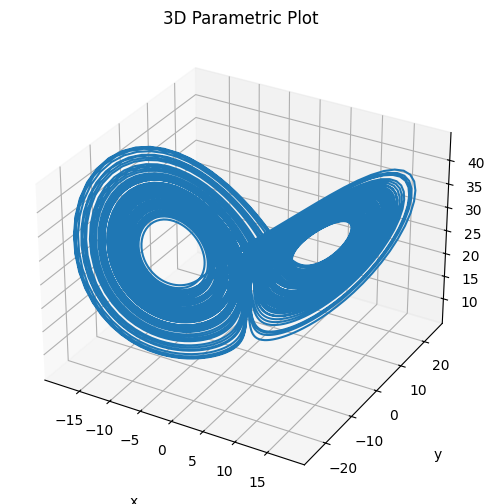

In [5]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
ax.grid()
x = line[:, 0]
y = line[:, 1]
z = line[:, 2]

ax.plot3D(x, y, z)
ax.set_title("3D Parametric Plot")

# Set axes label
ax.set_xlabel("x", labelpad=20)
ax.set_ylabel("y", labelpad=20)
ax.set_zlabel("z", labelpad=20)

plt.show()

Now that we have the data, let's assume we don't know the underlying system.<br>
We're going to apply the method discussed in the paper below.<br>

X is a matrix where the rows are system states at time steps, and X_dot is a matrix where the rows are the changes in system states at time steps.
If we have X and X_dot, then X_dot = X times a sparse matrix. we need to solve for that sparse matrix.

----------

In [6]:
from sindy import sindy, disp_cf

In [8]:
xy = (line[:, 0] * line[:, 1]).reshape(-1, 1)
yz = (line[:, 1] * line[:, 2]).reshape(-1, 1)
xz = (line[:, 0] * line[:, 2]).reshape(-1, 1)

theta = np.hstack((line, xy, yz, xz))

xi = sindy(theta, line_dot)

cf = disp_cf(xi, ["x", "y", "z", "xy", "yz", "xz"])

     x       |      y       |      z       |      xy      |      yz      |      xz      | 
      -10.00 |        10.00 |         0.00 |         0.00 |         0.00 |         0.00 | 
       28.00 |        -1.00 |         0.00 |         0.00 |         0.00 |        -1.00 | 
        0.00 |         0.00 |        -2.67 |         1.00 |         0.00 |         0.00 | 
